### Prétraitement des données

Le prétraitement des données est une technique de fouille de données qui consiste à transformer des données brutes en un format compréhensible et exploitable. Dans le monde réel, les données sont souvent incomplètes, incohérentes, ou ne reflètent pas certains comportements ou tendances attendus. Elles peuvent également contenir de nombreuses erreurs. Le prétraitement des données est une méthode éprouvée pour résoudre ces problèmes.

- Nettoyage des données (suppression ou correction des erreurs)
- Gestion des valeurs manquantes
- Normalisation ou standardisation
- Encodage des variables catégorielles
- Réduction de dimensionnalité

In [65]:
### Importations de base
import numpy as np
import pandas as pd
import os
import gc
import time
import timeit
import datetime
import random
import statistics
import warnings
from contextlib import contextmanager

### Importations pour la visualisation des données
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import missingno as msno
from tqdm.notebook import tqdm
from IPython.display import display, HTML

### Importations pour la manipulation des données
import re
from scipy import stats

### Importations pour le Machine Learning
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, auc,  roc_curve, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn import cluster, metrics
from sklearn.dummy import DummyClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

### Importations pour SHAP et gestion des avertissements spécifiques
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import shap
shap.initjs()

warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)

### Paramètres pandas
pd.set_option('mode.chained_assignment', None)  
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.options.display.width = 50
pd.options.display.max_colwidth = 1000

### Optionnel : Filtrer les avertissements
from warnings import filterwarnings
filterwarnings('ignore')

### Optionnel : Ajuster la largeur de l'écran pour IPython
#from IPython.display import display, HTML
#display(HTML("<style>.container { width:90% !important; }</style>"))

#### Les étapes suivantes sont impliquées dans le prétraitement des données :

**Importer le jeu de données et vérifier son format.**

In [66]:
import pandas as pd

# Définition des chemins d'accès aux fichiers
file_path_train_upd = r"C:\Users\Infogene\Documents\Khoty_Privé\congestion_reseau_predictor\data\train_upd.csv"
file_path_test_upd = r"C:\Users\Infogene\Documents\Khoty_Privé\congestion_reseau_predictor\data\test_upd.csv"

# Importation des jeux de données
dataset = pd.read_csv(file_path_train_upd)
test = pd.read_csv(file_path_test_upd)

cell_name = test['cell_name']

dataset.head()

,cell_name,4G_rat,par_year,par_month,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,social_ntwrking_bytes,cloud_computing_total_bytes,web_security_total_bytes,gaming_total_bytes,health_total_bytes,communication_total_bytes,file_sharing_total_bytes,remote_access_total_bytes,photo_sharing_total_bytes,software_dwnld_total_bytes,marketplace_total_bytes,storage_services_total_bytes,audio_total_bytes,location_services_total_bytes,presence_total_bytes,advertisement_total_bytes,system_total_bytes,voip_total_bytes,speedtest_total_bytes,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor,Congestion_Type
0,1090595862,1,2018,12,15,0,50,152,315,59012,2266,1034,113,395,68,10614,2,16,9,39,2,9,34,55,11888,88,15,15,10,10,33,46,39,103,69,6,2,ERICSSON,4G_BACKHAUL_CONGESTION
1,4826375369,1,2018,12,7,20,5,54,1871,334,4530,63,29,14,11,135,2,5,14,14,6,17,24,2,239,46,6,18,8,22,20,7,10,21,93,7,5,NOKIA,NC
2,3607540856,1,2018,12,5,16,35,277,887,945,23753,171,18,6,52,3818,4,8,36,33,13,45,10,3,15763,8,40,145,23,14,91,49,147,159,77,6,3,ERICSSON,3G_BACKHAUL_CONGESTION
3,1245076813,0,2018,12,16,21,60,51,8577,494,7956,66,60,19,14,2114,18,10,98,8,2,14,80,40,153,12,7,34,3,10,63,42,75,35,95,7,2,HUAWEI,3G_BACKHAUL_CONGESTION
4,404129745,1,2018,12,4,6,60,117,2084,1056,7244,232,59,90,19,605,16,89,14,36,70,22,41,839,962,115,42,272,4,67,59,91,197,316,112,3,5,HUAWEI,4G_RAN_CONGESTION


In [67]:
test.head()

,cell_name,4G_rat,par_year,par_month,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,social_ntwrking_bytes,cloud_computing_total_bytes,web_security_total_bytes,gaming_total_bytes,health_total_bytes,communication_total_bytes,file_sharing_total_bytes,remote_access_total_bytes,photo_sharing_total_bytes,software_dwnld_total_bytes,marketplace_total_bytes,storage_services_total_bytes,audio_total_bytes,location_services_total_bytes,presence_total_bytes,advertisement_total_bytes,system_total_bytes,voip_total_bytes,speedtest_total_bytes,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor
0,4398447675,1,2018,12,8,23,30,547,209,25799,16664,1395,165,108,123,419,22,11,27,8,36,102,4,61,460,24,50,7,5,8,42,12,15,23,120,3,3,ERICSSON
1,4152570378,1,2018,12,20,5,20,12,822,3865,66,253,80,18,22,247,2,12,23,8,6,95,1,21,428,20,29,18,3,341,77,5,21,155,91,6,3,HUAWEI
2,2902602672,1,2018,12,15,13,40,1747,10755,1711,18555,187,17,137,21,15,152,54,54,8,55,41,99,117,915,13,80,17,40,707,204,45,280,131,63,4,5,HUAWEI
3,1080083695,1,2018,12,7,13,50,5,7068,190,21105,166,12,6,8,369,4,34,3,3,10,10,34,27,129,19,2,15,7,1,16,4,25,3,61,4,5,HUAWEI
4,4413045057,1,2018,12,11,7,50,3298,1052,10151,32412,47,184,125,171,1273,1,2,34,7,14,71,10,198,343,90,15,316,380,7,18,15,45,8,61,7,5,ERICSSON


In [68]:
print(dataset.isnull().sum())

print()

print(test.isnull().sum())

cell_name                        0
4G_rat                           0
par_year                         0
par_month                        0
par_day                          0
par_hour                         0
par_min                          0
subscriber_count                 0
web_browsing_total_bytes         0
video_total_bytes                0
social_ntwrking_bytes            0
cloud_computing_total_bytes      0
web_security_total_bytes         0
gaming_total_bytes               0
health_total_bytes               0
communication_total_bytes        0
file_sharing_total_bytes         0
remote_access_total_bytes        0
photo_sharing_total_bytes        0
software_dwnld_total_bytes       0
marketplace_total_bytes          0
storage_services_total_bytes     0
audio_total_bytes                0
location_services_total_bytes    0
presence_total_bytes             0
advertisement_total_bytes        0
system_total_bytes               0
voip_total_bytes                 0
speedtest_total_byte

Nous constatons donc qu’aucune des colonnes ne contient de valeurs manquantes. Nous pouvons donc passer à l’étape suivante : l’encodage des variables catégorielles.

**Encodage des variables catégorielles**

Il y a deux variables catégorielles, à savoir : "ran_vendor" et "congestion type".
Nous allons utiliser l’encodage par étiquettes (label encoding) pour les transformer en valeurs numériques.

In [69]:
# Séparation des variables
X = dataset.iloc[:, 1:-1]        
test = test.iloc[:, 1:]          
y = dataset.iloc[:, 38:39]       

# Encodage de la variable "ran_vendor"
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()
X.iloc[:, 36] = labelencoder_X.fit_transform(X.iloc[:, 36])         
test.iloc[:, 36] = labelencoder_X.transform(test.iloc[:, 36])       

# Encodage de la variable cible "Congestion_Type"
labelencoder_y = LabelEncoder()
y.iloc[:, 0] = labelencoder_y.fit_transform(y.iloc[:, 0])

# Fusion des variables indépendantes et de la variable cible
df = pd.concat([X, y], axis=1)

df.head()

,4G_rat,par_year,par_month,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,social_ntwrking_bytes,cloud_computing_total_bytes,web_security_total_bytes,gaming_total_bytes,health_total_bytes,communication_total_bytes,file_sharing_total_bytes,remote_access_total_bytes,photo_sharing_total_bytes,software_dwnld_total_bytes,marketplace_total_bytes,storage_services_total_bytes,audio_total_bytes,location_services_total_bytes,presence_total_bytes,advertisement_total_bytes,system_total_bytes,voip_total_bytes,speedtest_total_bytes,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor,Congestion_Type
0,1,2018,12,15,0,50,152,315,59012,2266,1034,113,395,68,10614,2,16,9,39,2,9,34,55,11888,88,15,15,10,10,33,46,39,103,69,6,2,0,1
1,1,2018,12,7,20,5,54,1871,334,4530,63,29,14,11,135,2,5,14,14,6,17,24,2,239,46,6,18,8,22,20,7,10,21,93,7,5,2,3
2,1,2018,12,5,16,35,277,887,945,23753,171,18,6,52,3818,4,8,36,33,13,45,10,3,15763,8,40,145,23,14,91,49,147,159,77,6,3,0,0
3,0,2018,12,16,21,60,51,8577,494,7956,66,60,19,14,2114,18,10,98,8,2,14,80,40,153,12,7,34,3,10,63,42,75,35,95,7,2,1,0
4,1,2018,12,4,6,60,117,2084,1056,7244,232,59,90,19,605,16,89,14,36,70,22,41,839,962,115,42,272,4,67,59,91,197,316,112,3,5,1,2


#### Mise à l’échelle des caractéristiques (Feature Scaling)

La **standardisation** des variables consiste à **centrer** et **réduire** les données, c’est-à-dire :

> Standardiser les caractéristiques en supprimant la moyenne et en les redimensionnant selon l’écart-type.

La formule du score standard (*z-score*) pour une valeur \( x \) est :

z = X - μ / σ

où :
- μ est la moyenne des échantillons d'entraînement (ou zéro si `with_mean=False`)
- σ est l’écart-type des échantillons (ou 1 si `with_std=False`)

**Fonctionnement**

- Le **centrage** (soustraction de la moyenne) et le **redimensionnement** (division par l’écart-type) sont appliqués **indépendamment à chaque caractéristique**.
- Ces statistiques (moyenne et écart-type) sont **calculées sur l’ensemble d'entraînement** uniquement.
- Elles sont **mémorisées** pour être **réutilisées sur de nouvelles données**, par exemple les données de test, via la méthode `.transform()`.

La standardisation est **essentielle** pour de nombreux algorithmes d’apprentissage automatique (comme SVM, KNN, régression logistique, etc.), car ils peuvent être sensibles à l’échelle des données.  
Sans mise à l’échelle, un modèle pourrait accorder **plus d’importance** à certaines variables uniquement parce qu’elles ont des valeurs plus grandes, et non parce qu’elles sont plus informatives.

**MinMaxScaler** transforme chaque variable pour qu’elle soit comprise entre 0 et 1.

In [70]:
from sklearn import preprocessing

# Initialisation du scaler Min-Max
min_max_scaler = preprocessing.MinMaxScaler()

# Application du scaling sur les colonnes 6 à 35 (incluses) du jeu d'entraînement
df.iloc[:, 6:36] = min_max_scaler.fit_transform(df.iloc[:, 6:36])

# Application du même scaling sur les données de test
test.iloc[:, 6:36] = min_max_scaler.transform(test.iloc[:, 6:36])

# Affichage des premières lignes du DataFrame transformé
df.head()

,4G_rat,par_year,par_month,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,social_ntwrking_bytes,cloud_computing_total_bytes,web_security_total_bytes,gaming_total_bytes,health_total_bytes,communication_total_bytes,file_sharing_total_bytes,remote_access_total_bytes,photo_sharing_total_bytes,software_dwnld_total_bytes,marketplace_total_bytes,storage_services_total_bytes,audio_total_bytes,location_services_total_bytes,presence_total_bytes,advertisement_total_bytes,system_total_bytes,voip_total_bytes,speedtest_total_bytes,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor,Congestion_Type
0,1,2018,12,15,0,50,0.009113,0.001003,0.178126,0.007451,0.054706,0.067827,0.240560,0.043175,0.066198,0.006079,0.048930,0.011936,0.046373,0.003401,0.005740,0.051988,0.033193,0.076621,0.052980,0.009659,0.009615,0.006203,0.006398,0.019643,0.027694,0.024209,0.064375,0.150000,0.8,0.000000,0,1
1,1,2018,12,7,20,5,0.003199,0.006006,0.000993,0.014918,0.003333,0.017407,0.008526,0.006984,0.000836,0.006079,0.015291,0.018568,0.016647,0.010204,0.010842,0.036697,0.001207,0.001528,0.027694,0.003863,0.011538,0.004963,0.014075,0.011905,0.004214,0.006207,0.013125,0.550000,1.0,1.000000,2,3
2,1,2018,12,5,16,35,0.016658,0.002842,0.002838,0.078319,0.009047,0.010804,0.003654,0.033016,0.023808,0.012158,0.024465,0.047745,0.039239,0.022109,0.028699,0.015291,0.001811,0.101601,0.004816,0.025757,0.092949,0.014268,0.008957,0.054167,0.029500,0.091248,0.099375,0.283333,0.8,0.333333,0,0
3,0,2018,12,16,21,60,0.003018,0.027569,0.001476,0.026217,0.003492,0.036014,0.011571,0.008889,0.013180,0.054711,0.030581,0.129973,0.009512,0.003401,0.008929,0.122324,0.024140,0.000973,0.007225,0.004507,0.021795,0.001861,0.006398,0.037500,0.025286,0.046555,0.021875,0.583333,1.0,0.000000,1,0
4,1,2018,12,4,6,60,0.007001,0.006691,0.003173,0.023869,0.012274,0.035414,0.054811,0.012063,0.003767,0.048632,0.272171,0.018568,0.042806,0.119048,0.014031,0.062691,0.506337,0.006188,0.069235,0.027044,0.174359,0.002481,0.042866,0.035119,0.054786,0.122284,0.197500,0.866667,0.2,1.000000,1,2


#### Analyse Exploratoire des Données (Exploratory Data Analysis – EDA)

L’analyse exploratoire des données est une **étape essentielle** qui consiste à effectuer des investigations initiales sur les données afin de :

- **Découvrir des motifs ou tendances cachées**
- **Identifier d’éventuelles anomalies ou valeurs aberrantes**
- **Tester des hypothèses**
- **Vérifier certaines hypothèses statistiques**

L’EDA permet de **mieux comprendre la structure des données**, leur distribution, et les relations entre les variables avant de construire un modèle de machine learning.

- Distribution des classes de **"Congestion_Type"**
- Répartition des valeurs pour certaines features
- **Corrélations** entre variables
- Comparaison de la congestion selon **"ran_vendor"** ou d'autres dimensions ?

**Statistiques descriptives du jeu de données** : 
Obtenons le **nombre de valeurs**, la **moyenne**, l’**écart-type**, les **valeurs minimales et maximales**, ainsi que les **quantiles** (25%, 50%, 75%) pour chaque variable numérique.

In [71]:
df.describe()

,4G_rat,par_year,par_month,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,social_ntwrking_bytes,cloud_computing_total_bytes,web_security_total_bytes,gaming_total_bytes,health_total_bytes,communication_total_bytes,file_sharing_total_bytes,remote_access_total_bytes,photo_sharing_total_bytes,software_dwnld_total_bytes,marketplace_total_bytes,storage_services_total_bytes,audio_total_bytes,location_services_total_bytes,presence_total_bytes,advertisement_total_bytes,system_total_bytes,voip_total_bytes,speedtest_total_bytes,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor,Congestion_Type
count,78560.000000,78560.0,78560.0,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000
mean,0.499173,2018.0,12.0,15.503831,11.514588,33.061736,0.034413,0.026008,0.025020,0.027546,0.033266,0.043279,0.043332,0.045793,0.026734,0.056167,0.055366,0.052301,0.046214,0.054736,0.044869,0.049610,0.042609,0.027222,0.042558,0.045272,0.045269,0.043852,0.045417,0.042229,0.042501,0.043898,0.043580,0.499862,0.498429,0.501018,0.999478,1.498854
std,0.500002,0.0,0.0,8.634375,6.934351,16.535863,0.065198,0.061560,0.058753,0.064309,0.066449,0.070981,0.070367,0.074868,0.061355,0.078245,0.077330,0.079691,0.071731,0.082449,0.073506,0.075006,0.070793,0.061952,0.070190,0.074837,0.075164,0.073264,0.075382,0.069723,0.070829,0.073267,0.071637,0.293973,0.341859,0.371752,0.816530,1.120077
min,0.000000,2018.0,12.0,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2018.0,12.0,8.000000,5.000000,20.000000,0.004225,0.001376,0.001407,0.001524,0.003651,0.008403,0.008526,0.008254,0.001709,0.015198,0.012232,0.011936,0.009512,0.011905,0.008291,0.010703,0.007846,0.001728,0.007827,0.008371,0.008333,0.008065,0.008317,0.007738,0.007827,0.008070,0.008125,0.250000,0.200000,0.333333,0.000000,0.000000
50%,0.000000,2018.0,12.0,16.000000,12.000000,35.000000,0.011226,0.004960,0.005034,0.005524,0.009999,0.018607,0.018879,0.019683,0.005695,0.030395,0.030581,0.025199,0.021403,0.025510,0.019133,0.024465,0.018105,0.005811,0.018061,0.019317,0.019231,0.018610,0.019194,0.017857,0.018061,0.018622,0.018750,0.500000,0.400000,0.666667,1.000000,1.000000
75%,1.000000,2018.0,12.0,23.000000,18.000000,45.000000,0.034221,0.021099,0.020767,0.023092,0.031374,0.046218,0.046285,0.048889,0.022542,0.063830,0.064220,0.057029,0.049941,0.061224,0.047832,0.055046,0.045263,0.022899,0.045154,0.048294,0.048077,0.046526,0.047985,0.045238,0.044551,0.046555,0.046875,0.750000,0.800000,0.666667,2.000000,3.000000
max,1.000000,2018.0,12.0,30.000000,23.000000,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000


On remarque une grande différence entre le 75e percentile et la valeur maximale pour certaines variables prédictives, notamment "usage data".
Cela suggère la présence de valeurs extrêmes (outliers) dans notre jeu de données.

In [72]:
# Vérification du nombre d'occurrences pour chaque classe de la variable cible
df.Congestion_Type.value_counts()

3    19771
1    19765
0    19688
2    19336
Name: Congestion_Type, dtype: int64

Cela nous indique que les quatre types de congestion sont presque symétriques et également répartis.
C’est un bon aperçu des données !

**Visualisation des données**  

Les corrélations entre variables peuvent être identifiées à l'aide de la fonction `.corr()` de **pandas**, puis visualisées sous forme de matrice grâce à un **heatmap** avec la bibliothèque **seaborn**.

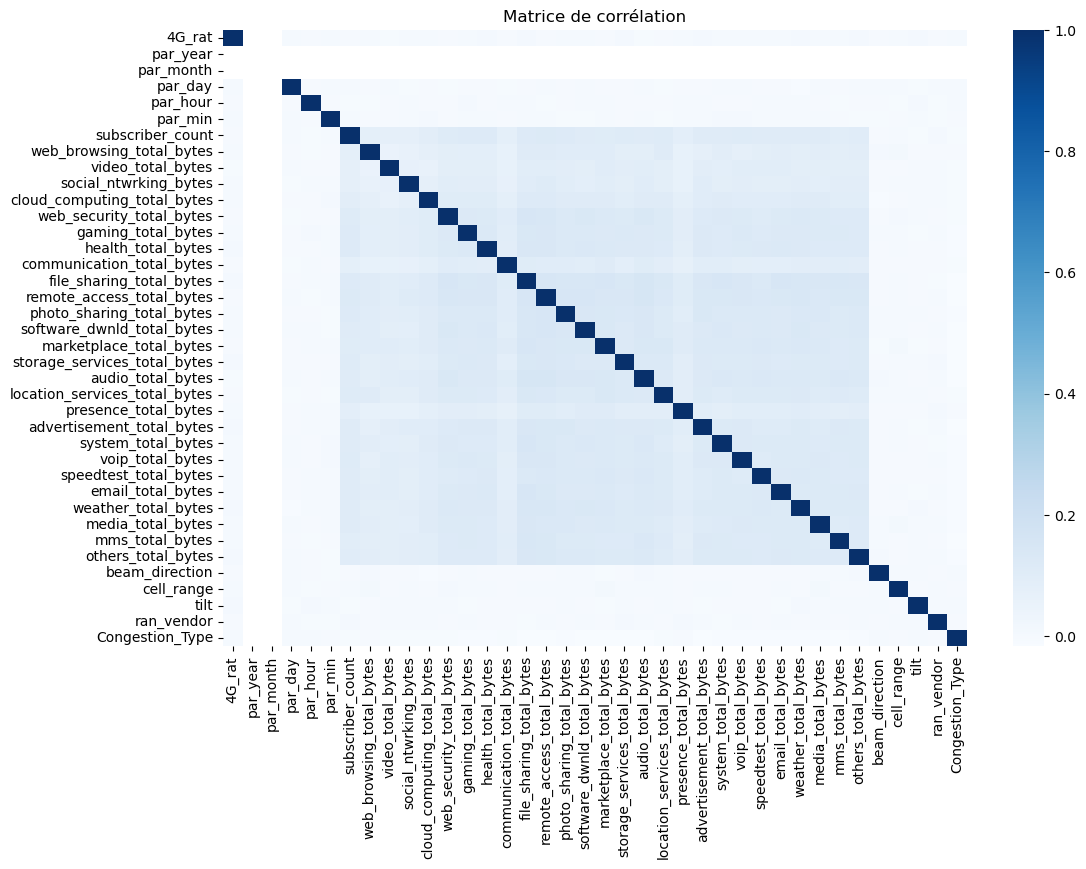

In [73]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=False)
plt.title("Matrice de corrélation")
plt.show()

Les teintes foncées indiquent une **corrélation positive**, tandis que les teintes plus claires indiquent une **corrélation négative**.  

Pour vérifier la **linéarité des variables**, il est recommandé de **tracer les graphes de distribution** afin d’observer la **symétrie ou l’asymétrie (skewness)** des caractéristiques.  
L’estimation de densité par noyau (*Kernel Density Estimate – KDE*) est un outil très utile pour visualiser la **forme de la distribution** des données.

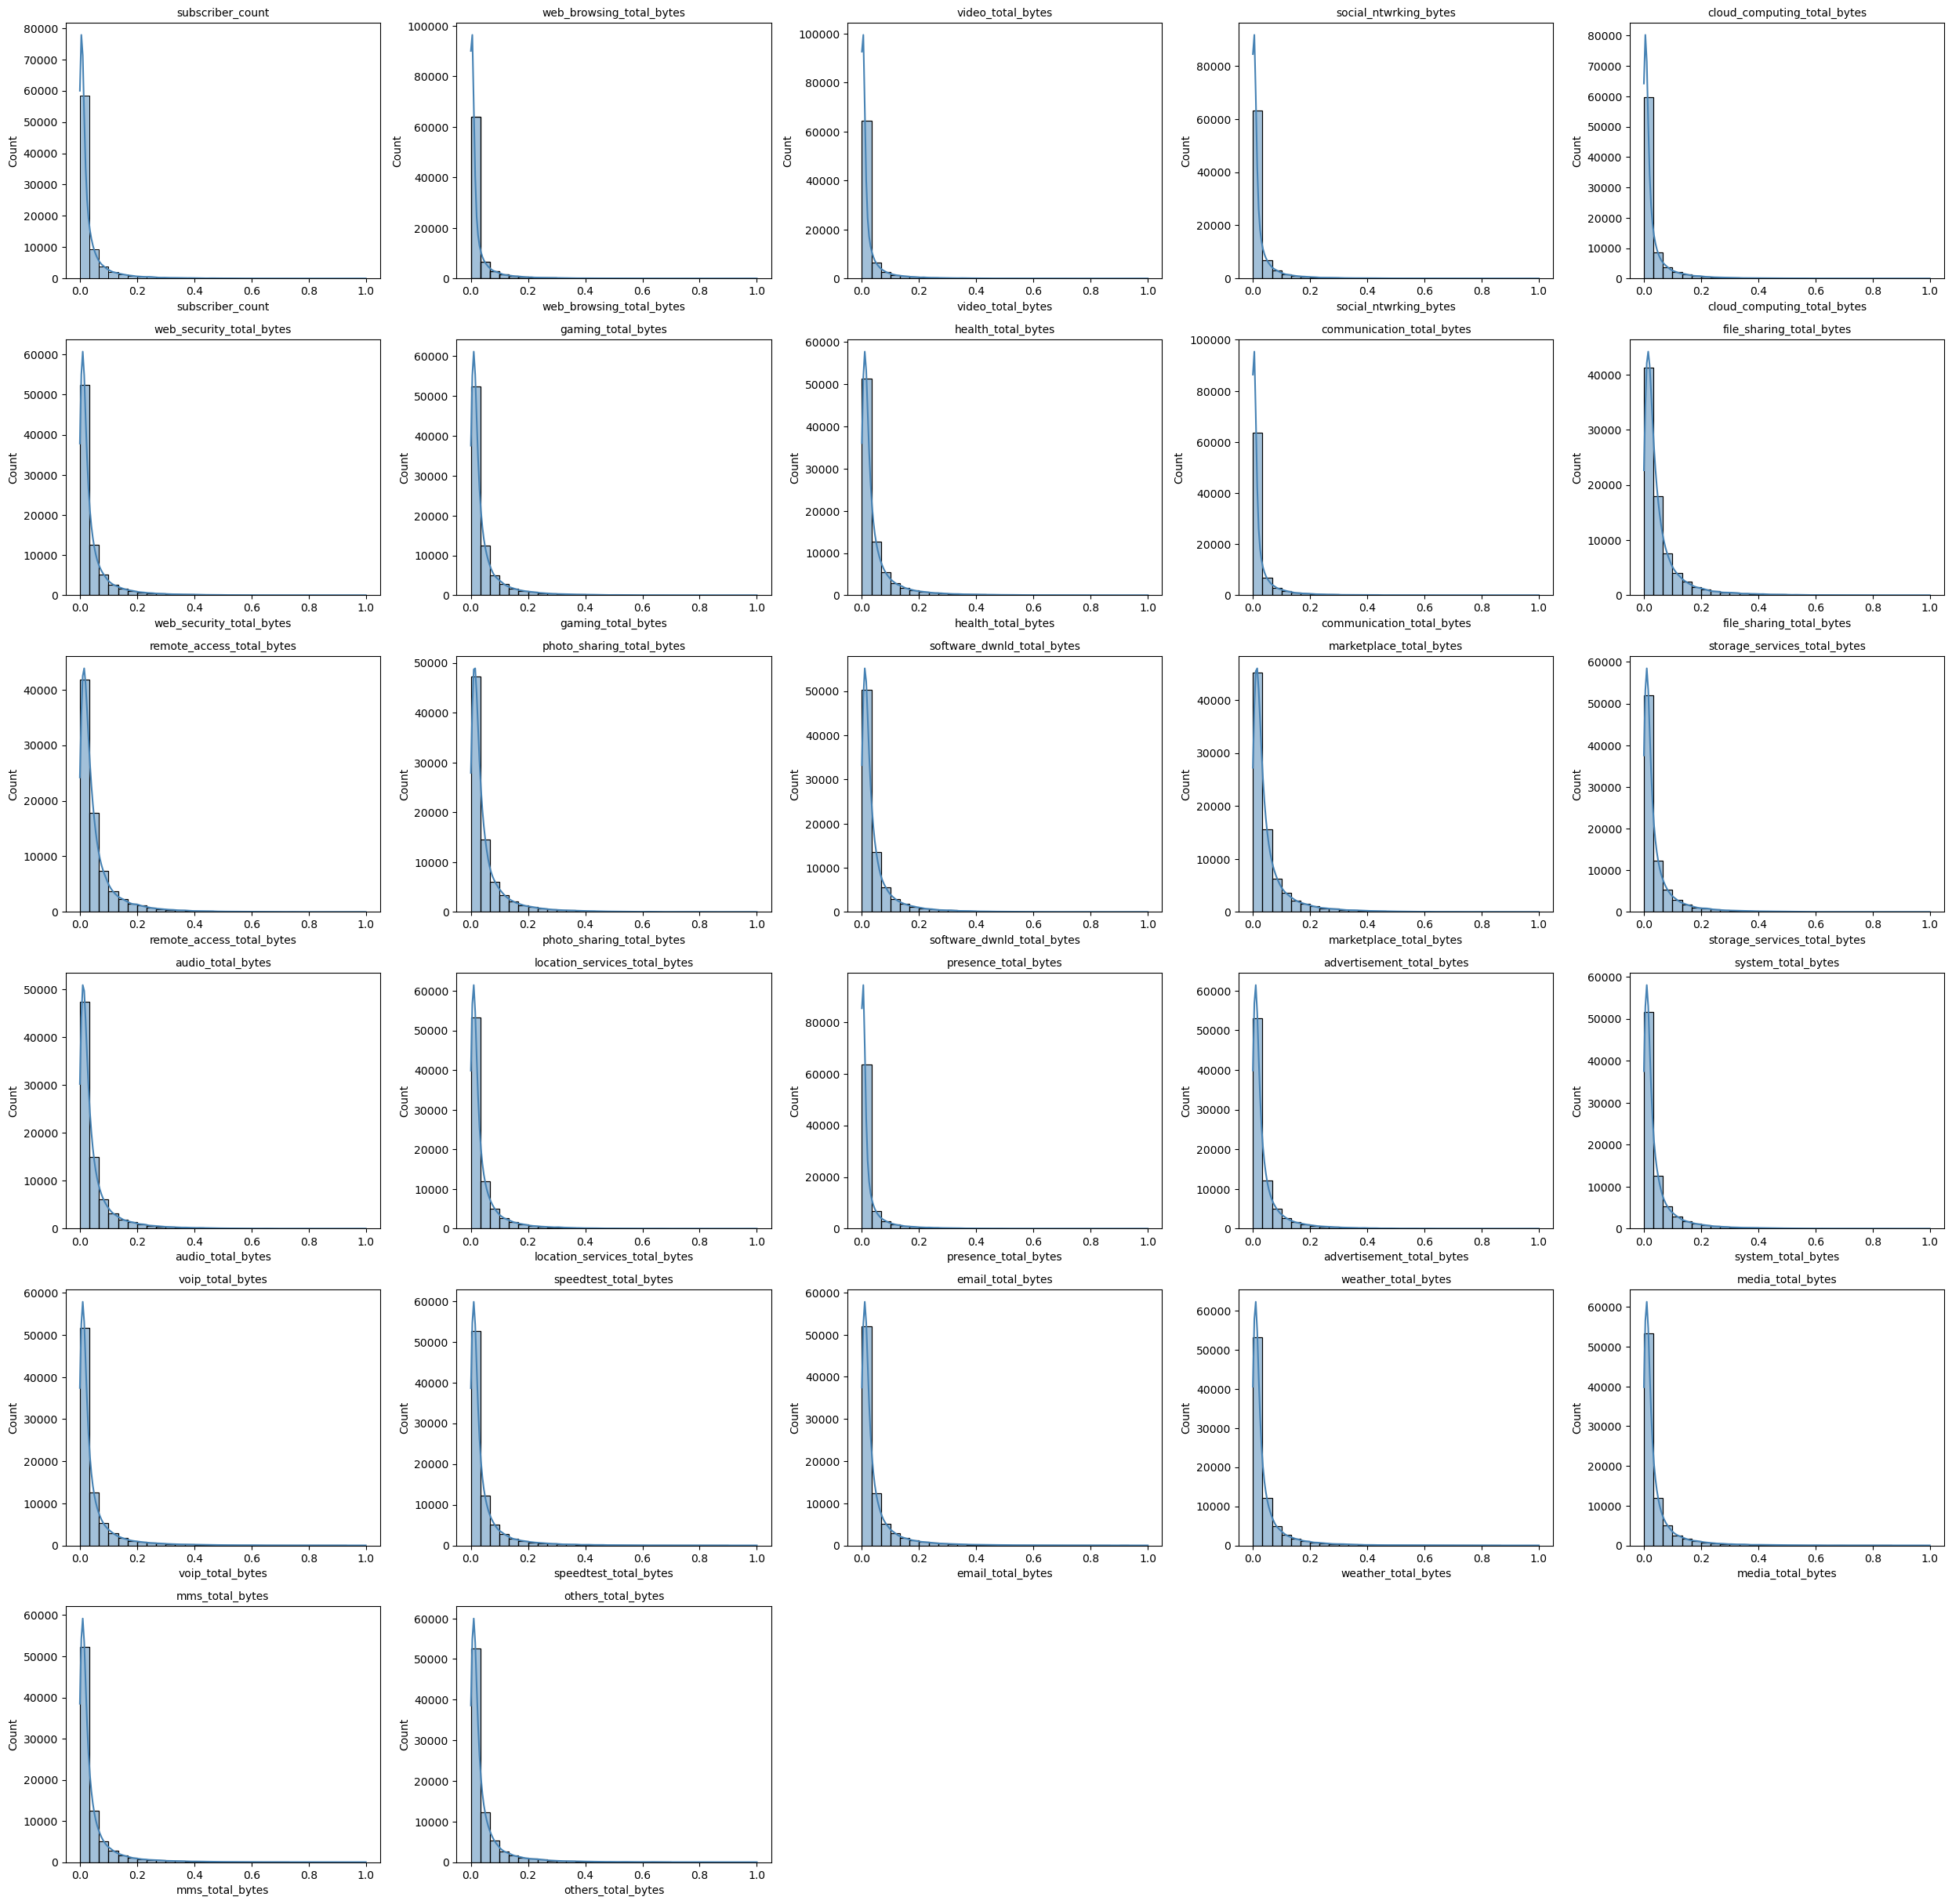

In [74]:
# Liste des noms de colonnes
l = df.columns.values

# Paramètres pour organiser les sous-graphiques
number_of_columns = 5
number_of_rows = int((len(l)-6) / number_of_columns) + 1

plt.figure(figsize=(5 * number_of_columns, 4 * number_of_rows))

# Boucle pour tracer les distributions des variables (colonnes 6 à 32)
for i in range(6, 33):
    plt.subplot(number_of_rows, number_of_columns, i - 5)  
    sns.histplot(df[l[i]], kde=True, bins=30, color='steelblue')
    plt.title(l[i], fontsize=10)
    plt.tight_layout()

plt.show()

Toutes les variables indépendantes liées à **"usage data"** présentent une **asymétrie à droite** (ou **asymétrie positive**).  
Cela signifie que la **majorité des valeurs sont concentrées sur la gauche** de la distribution, avec une **queue étirée vers la droite**, ce qui est typique lorsque des événements rares prennent des valeurs très élevées.

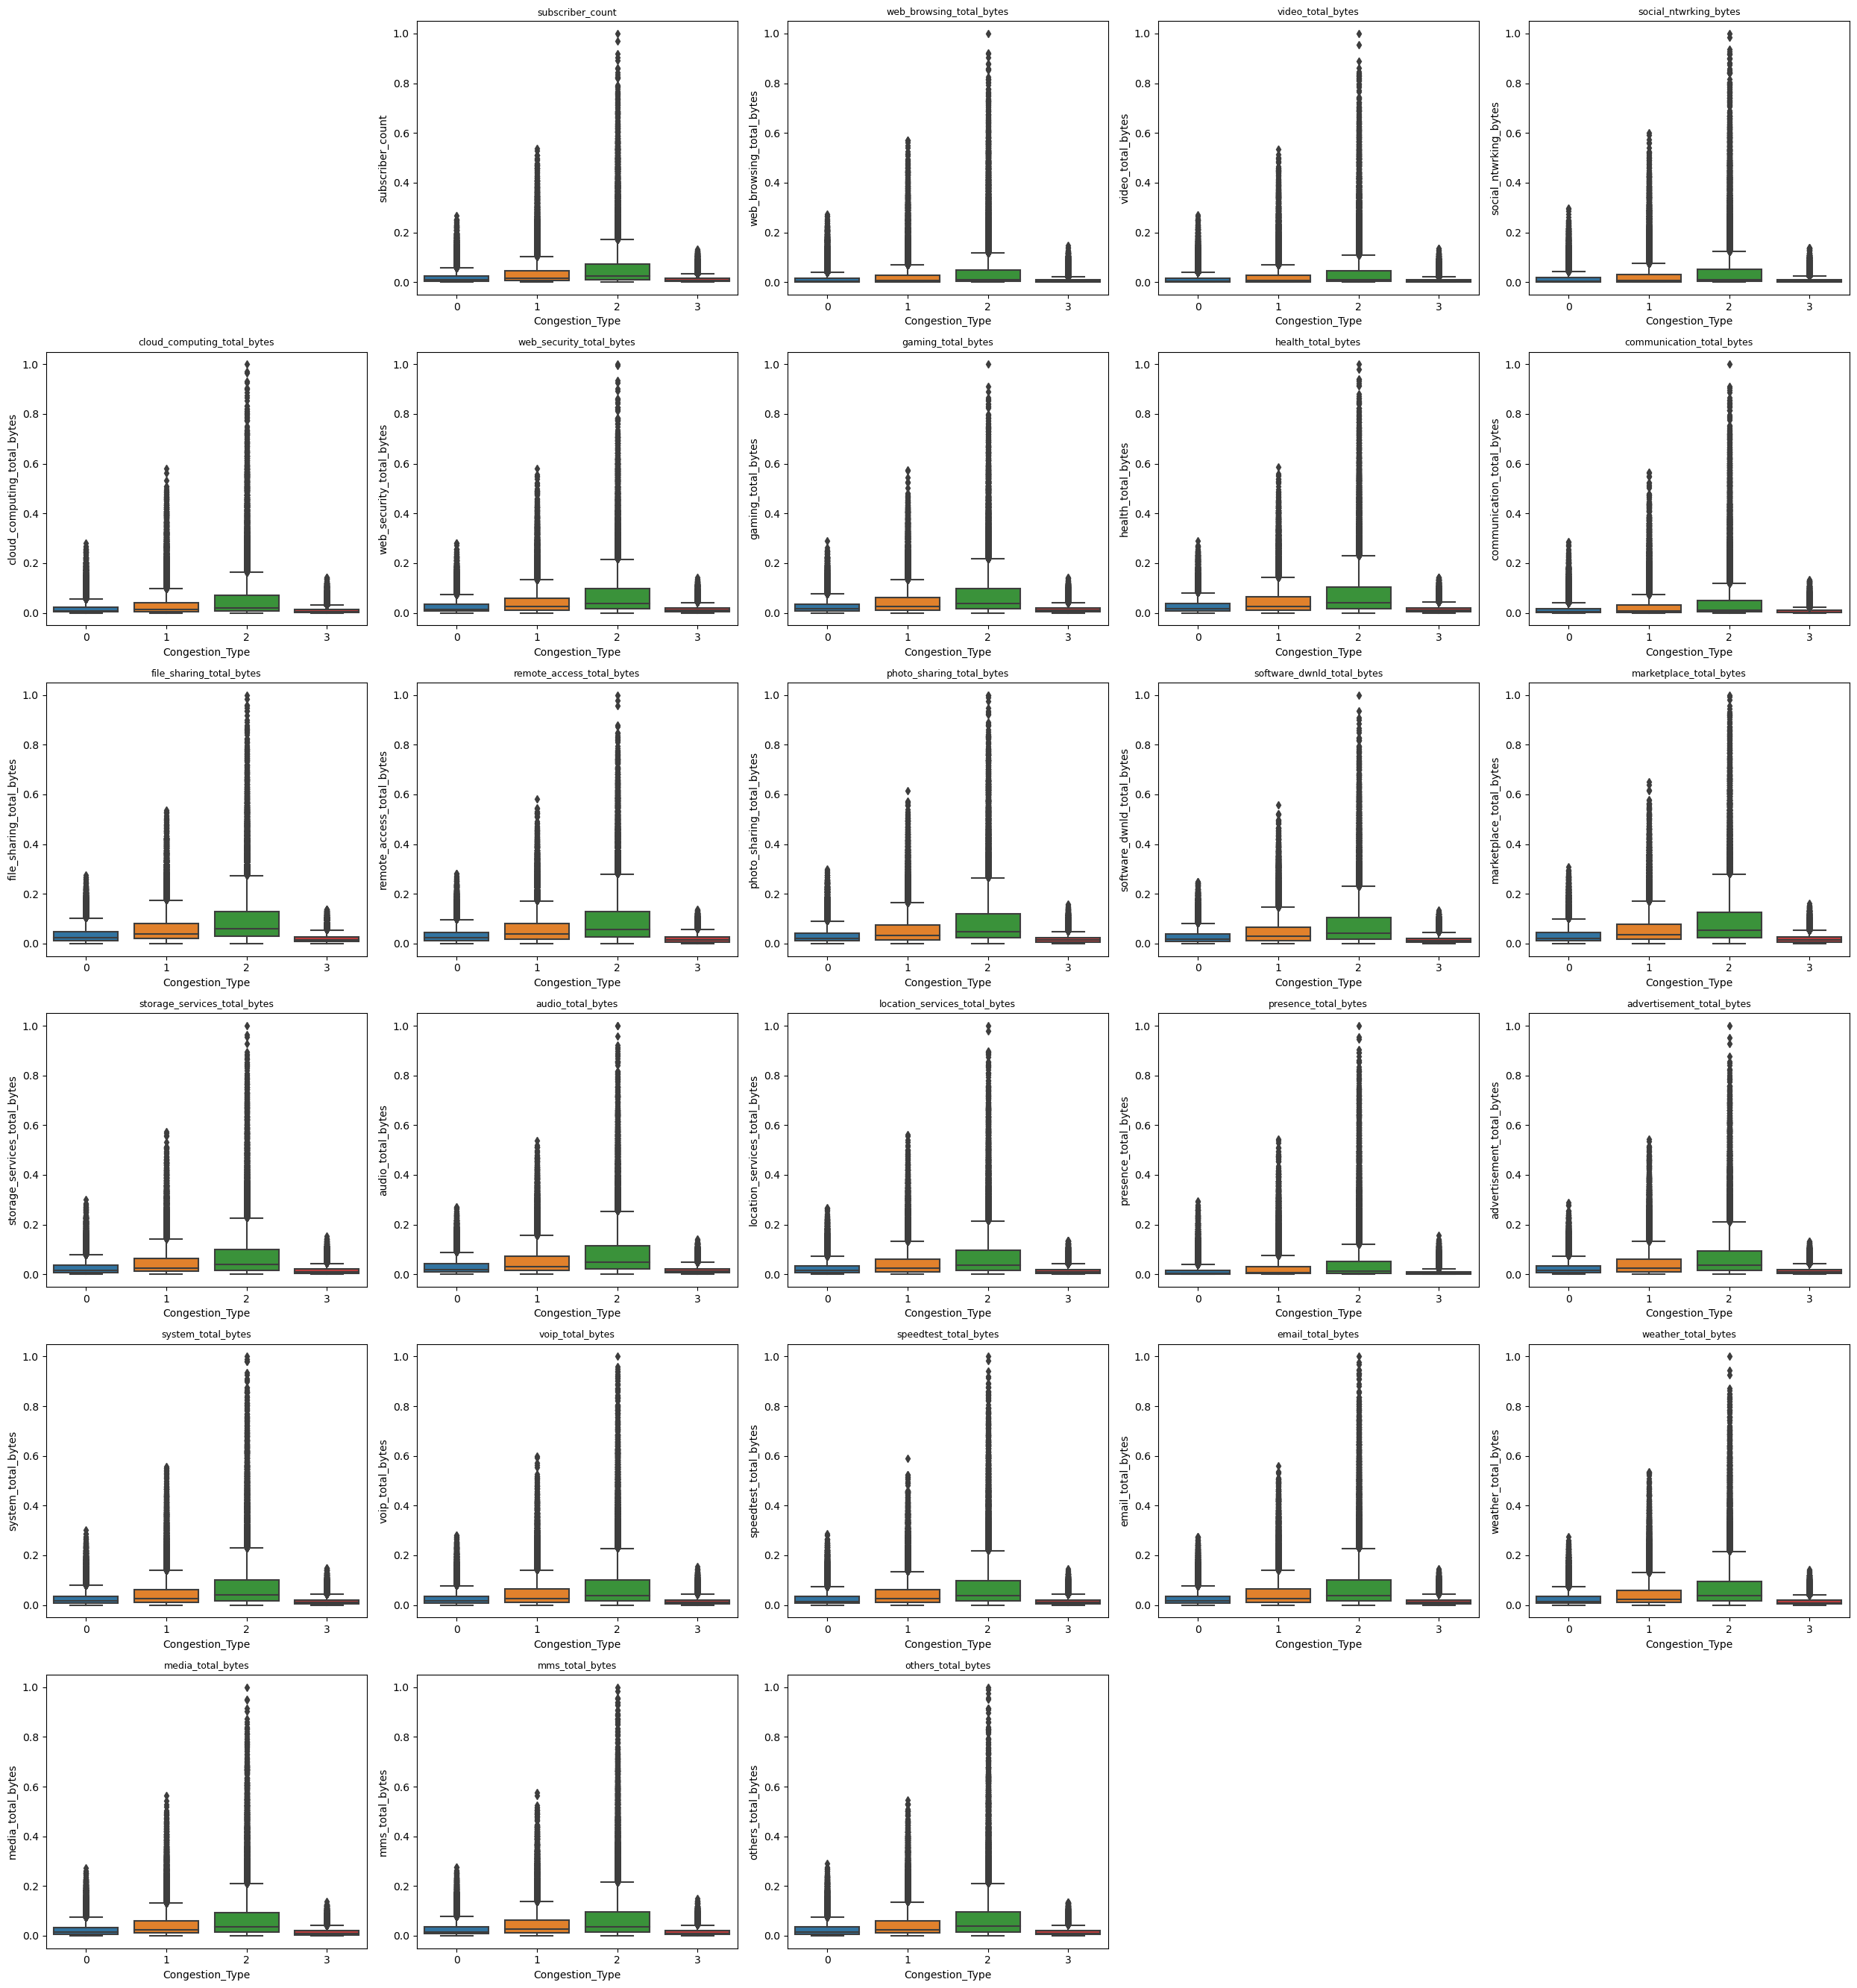

In [75]:
plt.figure(figsize=(5 * number_of_columns, 5 * number_of_rows))

# Tracer des boxplots pour les colonnes de 6 à 32
for j in range(6, 33):
    plt.subplot(number_of_rows + 1, number_of_columns, j + 1)
    sns.boxplot(y=df[l[j]], x=df[l[37]])  # l[37] correspond à la variable 'Congestion_Type'
    plt.title(l[j], fontsize=9)
    plt.tight_layout()

plt.show()

- La plupart des variables présentent une **dispersion importante**, avec **de nombreux outliers** (points noirs au-dessus des moustaches).
- Les **valeurs médianes** (barres dans les boîtes) varient entre les types de congestion, ce qui suggère que **certains usages sont plus associés à certains types de congestion**.
- Les boîtes correspondant à la **classe 2 (ou 3)** ont souvent des **valeurs plus élevées**, ce qui peut indiquer un lien entre certains types de trafic (par exemple le streaming ou les jeux) et une **congestion plus sévère**.

### Ingénierie des caractéristiques (Feature Engineering)

L’ingénierie des caractéristiques est une étape **essentielle** dans la construction de tout système intelligent.  
Elle consiste à **transformer les données brutes en variables pertinentes**, appelées *features*, qui serviront d’entrées aux modèles de machine learning.  
Des **caractéristiques de bonne qualité** permettent d’**améliorer considérablement la performance globale du modèle**.

### Regroupement (Binning) de `par_day` et `par_hour`

- Nous allons créer **deux catégories** pour la variable `par_day` :  
  ➤ **Semaine (weekdays)** et **week-end (weekends)**

- Nous allons également créer **quatre catégories** pour `par_hour` :  
  ➤ **Matin**, **Journée**, **Soirée**, et **Nuit**

Cette transformation s’appuie sur l’hypothèse que le **trafic réseau varie fortement selon le jour** (semaine vs week-end) et **selon l’heure** (activités différentes à différents moments de la journée).

In [76]:
# Encodage des jours par_day (week-end vs semaine)

# Marquage des week-ends (valeur 1) dans les données d'entraînement
df['par_day'].replace(
    to_replace=[1, 2, 8, 9, 15, 16, 22, 23, 29, 30], 
    value=1, 
    inplace=True)

# Marquage des jours de semaine (valeur 0)
df['par_day'].replace(
    to_replace=[3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 31], 
    value=0, 
    inplace=True)

# Même transformation sur le jeu de test
test['par_day'].replace(
    to_replace=[1, 2, 8, 9, 15, 16, 22, 23, 29, 30], 
    value=1, 
    inplace=True)

test['par_day'].replace(
    to_replace=[3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 31], 
    value=0, 
    inplace=True)

In [77]:
# Suppression de la colonne par_day
df.drop(['par_day'], inplace=True, axis=1)
test.drop(['par_day'], inplace=True, axis=1)

**Transformation de `par_hour` en plages horaires**

On crée **quatre nouvelles colonnes** pour représenter les différentes périodes de la journée à partir de la variable `par_hour` :

- `morning` → de **2h à 8h**
- `day` → de **8h à 18h**
- `evening` → de **18h à 22h**
- `night` → de **22h à 2h** (inclusif, chevauche deux jours)

In [78]:
# Données d'entraînement
df['morning'] = [1 if (x >= 2 and x < 8) else 0 for x in df['par_hour']]
df['day'] = [1 if (x >= 8 and x < 18) else 0 for x in df['par_hour']]
df['evening'] = [1 if (x >= 18 and x < 22) else 0 for x in df['par_hour']]
df['night'] = [1 if (x >= 22 or x < 2) else 0 for x in df['par_hour']]

# Données de test
test['morning'] = [1 if (x >= 2 and x < 8) else 0 for x in test['par_hour']]
test['day'] = [1 if (x >= 8 and x < 18) else 0 for x in test['par_hour']]
test['evening'] = [1 if (x >= 18 and x < 22) else 0 for x in test['par_hour']]
test['night'] = [1 if (x >= 22 or x < 2) else 0 for x in test['par_hour']]

In [79]:
# Suppression de la colonne par_hour
df.drop(['par_hour'], inplace=True, axis=1)
test.drop(['par_hour'], inplace=True, axis=1)

**Regroupement des données d’usage TCP et UDP**

Il existe deux principaux protocoles de communication sur Internet :  
- **TCP (Transmission Control Protocol)**  
- **UDP (User Datagram Protocol)**

Toutes les transmissions de données via les réseaux cellulaires utilisent **l’un ou l’autre de ces protocoles**.  
Dans ce contexte, nous avons **regroupé les différentes colonnes liées aux types de données transmises**, en fonction du protocole **(TCP ou UDP)** qui les gouverne, afin de **réduire la complexité** et **mieux représenter l’utilisation réseau par type de protocole**.

### Regroupement des volumes de données par protocole (TCP/UDP)

On agrège les différentes colonnes représentant des usages spécifiques en **deux nouvelles variables** :  
- `TCP` : total des données échangées via le protocole **TCP**
- `UDP` : total des données échangées via le protocole **UDP**

On calcule également une **nouvelle variable `ratio`**, représentant le **rapport entre les volumes UDP et TCP**, ce qui peut être un indicateur utile du **type de trafic dominant** (streaming, navigation, jeux, etc.).

**Avantages de cette approche :**
- Réduction de la dimensionnalité sans perte d’information métier
- Nouvelle feature (`ratio`) qui peut **améliorer la capacité de discrimination du modèle**
- Meilleure lisibilité du trafic réseau par protocole

In [80]:
# Regroupement TCP - Données d'entraînement
df['TCP'] = df['web_browsing_total_bytes'] + df['social_ntwrking_bytes'] + df['health_total_bytes'] + \
            df['communication_total_bytes'] + df['file_sharing_total_bytes'] + df['remote_access_total_bytes'] + \
            df['location_services_total_bytes'] + df['presence_total_bytes'] + df['advertisement_total_bytes'] + \
            df['voip_total_bytes'] + df['speedtest_total_bytes'] + df['email_total_bytes'] + \
            df['weather_total_bytes'] + df['mms_total_bytes'] + df['others_total_bytes']

# Regroupement UDP - Données d'entraînement
df['UDP'] = df['video_total_bytes'] + df['cloud_computing_total_bytes'] + df['web_security_total_bytes'] + \
            df['gaming_total_bytes'] + df['photo_sharing_total_bytes'] + df['software_dwnld_total_bytes'] + \
            df['marketplace_total_bytes'] + df['storage_services_total_bytes'] + df['audio_total_bytes'] + \
            df['system_total_bytes'] + df['media_total_bytes']

# Ratio UDP / TCP
df['ratio'] = df['UDP'] / df['TCP']

# Même traitement pour les données de test
test['TCP'] = test['web_browsing_total_bytes'] + test['social_ntwrking_bytes'] + test['health_total_bytes'] + \
              test['communication_total_bytes'] + test['file_sharing_total_bytes'] + test['remote_access_total_bytes'] + \
              test['location_services_total_bytes'] + test['presence_total_bytes'] + test['advertisement_total_bytes'] + \
              test['voip_total_bytes'] + test['speedtest_total_bytes'] + test['email_total_bytes'] + \
              test['weather_total_bytes'] + test['mms_total_bytes'] + test['others_total_bytes']

test['UDP'] = test['video_total_bytes'] + test['cloud_computing_total_bytes'] + test['web_security_total_bytes'] + \
              test['gaming_total_bytes'] + test['photo_sharing_total_bytes'] + test['software_dwnld_total_bytes'] + \
              test['marketplace_total_bytes'] + test['storage_services_total_bytes'] + test['audio_total_bytes'] + \
              test['system_total_bytes'] + test['media_total_bytes']

test['ratio'] = test['UDP'] / test['TCP']

### Regroupement des colonnes de données ayant des distributions similaires

Dans cette étape, nous avons **regroupé les variables représentant des volumes de données** qui présentent des **distributions similaires**.  
Chaque groupe est fusionné en une **seule variable moyennée**, afin de conserver une **échelle cohérente** entre les nouvelles variables créées et les anciennes.

**Convention de nommage :**
- Le dernier caractère du nom de chaque nouvelle variable indique si les variables regroupées relèvent du protocole **TCP (`t`)** ou **UDP (`u`)**.

**Regroupement des volumes de données avec des distributions similaires**

Dans cette étape, on crée deux nouvelles variables :

- `temp1` : moyenne des volumes de données pour les usages **UDP** ayant une distribution similaire (5 colonnes)
- `temp2` : moyenne des volumes de données pour les usages **TCP** ayant une distribution similaire (9 colonnes)

Cela permet de **réduire la dimensionnalité** tout en **conservant l'information essentielle**, et en maintenant l’**échelle comparable** avec les autres variables du jeu de données.

**Avantage de cette approche :**
- Réduction du nombre de variables tout en **préservant la nature du trafic**.
- Meilleure **stabilité du modèle** avec des variables plus générales.
- Conservation de l’**homogénéité des échelles** grâce au moyennage.

Souhaites-tu maintenant supprimer les colonnes originales utilisées pour `temp1` et `temp2` ? Je peux te générer une ligne de code pour ça.

In [81]:
# Données d'entraînement
df['temp1'] = df['web_security_total_bytes'] + df['gaming_total_bytes'] + df['storage_services_total_bytes'] + \
              df['system_total_bytes'] + df['media_total_bytes']

df['temp2'] = df['health_total_bytes'] + df['location_services_total_bytes'] + df['advertisement_total_bytes'] + \
              df['voip_total_bytes'] + df['speedtest_total_bytes'] + df['email_total_bytes'] + \
              df['weather_total_bytes'] + df['mms_total_bytes'] + df['others_total_bytes']

# Moyennage pour maintenir l’échelle
df['temp1'] = df['temp1'] / 5
df['temp2'] = df['temp2'] / 9

# Données de test
test['temp1'] = test['web_security_total_bytes'] + test['gaming_total_bytes'] + test['storage_services_total_bytes'] + \
                test['system_total_bytes'] + test['media_total_bytes']

test['temp2'] = test['health_total_bytes'] + test['location_services_total_bytes'] + test['advertisement_total_bytes'] + \
                test['voip_total_bytes'] + test['speedtest_total_bytes'] + test['email_total_bytes'] + \
                test['weather_total_bytes'] + test['mms_total_bytes'] + test['others_total_bytes']

# Moyennage
test['temp1'] = test['temp1'] / 5
test['temp2'] = test['temp2'] / 9

In [82]:
"""
Regroupement des données de navigation web et de réseaux sociaux**
On crée une nouvelle variable `temp3` représentant la **moyenne des volumes de données 
liés à la navigation Internet** (`web_browsing_total_bytes`) et aux **réseaux sociaux** (`social_ntwrking_bytes`).  
Ces deux types d’usage ayant une distribution similaire, il est logique de les **regrouper** pour simplifier le modèle tout 
en conservant une **bonne représentation du trafic utilisateur régulier**.

Pourquoi cette transformation est utile :
- Elle réduit la **redondance** entre deux variables très proches.
- Elle **lisse les variations extrêmes** liées à un seul type d’usage.
- Elle garde une **échelle cohérente** avec les autres variables regroupées (`temp1`, `temp2`...).
"""

# Données d'entraînement
df['temp3'] = (df['web_browsing_total_bytes'] + df['social_ntwrking_bytes']) / 2

# Données de test
test['temp3'] = (test['web_browsing_total_bytes'] + test['social_ntwrking_bytes']) / 2

In [83]:
"""
Regroupement des données de présence et de communication

On crée une nouvelle variable `temp4` en combinant les volumes de données liés à :
- `presence_total_bytes` (services de présence, détection de statut en ligne)
- `communication_total_bytes` (messagerie, appels, échanges directs)

Ces deux usages sont proches **dans leur nature fonctionnelle (communication interpersonnelle)**, 
ce qui justifie leur regroupement.  On calcule la **moyenne** pour maintenir une échelle cohérente.

Pourquoi ce regroupement est pertinent :**
- Ces usages sont souvent liés (ex. : une app de messagerie gère à la fois la présence et les messages).
- Cela **simplifie la structure des données** sans perte d’information significative.
- La moyenne permet de **garder les proportions stables** vis-à-vis des autres variables.
"""

# Données d'entraînement
df['temp4'] = (df['presence_total_bytes'] + df['communication_total_bytes']) / 2

# Données de test
test['temp4'] = (test['presence_total_bytes'] + test['communication_total_bytes']) / 2

In [84]:
"""
Regroupement des données liées au partage de photos et aux téléchargements de logiciels

On crée une nouvelle variable `temp5` en combinant :

- `photo_sharing_total_bytes` : données utilisées pour partager ou consulter des photos
- `software_dwnld_total_bytes` : données consommées lors de téléchargements de logiciels

Ces deux types d’usage impliquent des **transferts de fichiers conséquents**, souvent en **téléchargement direct**, 
ce qui justifie leur regroupement. La **moyenne** permet de conserver une échelle homogène avec les autres variables.
"""

# Données d'entraînement
df['temp5'] = (df['photo_sharing_total_bytes'] + df['software_dwnld_total_bytes']) / 2

# Données de test
test['temp5'] = (test['photo_sharing_total_bytes'] + test['software_dwnld_total_bytes']) / 2

In [85]:
"""
Regroupement des données liées au partage de fichiers et à l'accès à distance

On crée une nouvelle variable `temp6` à partir de :

- `file_sharing_total_bytes` : volume de données échangées via des plateformes de partage de fichiers (ex. : P2P, cloud)
- `remote_access_total_bytes` : données utilisées pour accéder à distance à un serveur ou un autre appareil

Ces deux usages impliquent des **transferts directs et continus de données**, souvent en contexte professionnel ou 
collaboratif, ce qui en fait un **groupe logique à fusionner**.

Avantage : Ce regroupement permet de **réduire le nombre de variables** tout en maintenant une représentation fidèle de 
l’usage réseau par fonctionnalité.
"""

# Données d'entraînement
df['temp6'] = (df['file_sharing_total_bytes'] + df['remote_access_total_bytes']) / 2

# Données de test
test['temp6'] = (test['file_sharing_total_bytes'] + test['remote_access_total_bytes']) / 2

In [86]:
"""
Regroupement des données de marketplace et de contenu audio

On crée une nouvelle variable `temp7` en combinant :

- `marketplace_total_bytes` : données consommées sur les plateformes d’achat ou de vente en ligne
- `audio_total_bytes` : données utilisées pour écouter de la musique, des podcasts ou tout autre contenu audio

Ces deux types d’usage peuvent représenter des **activités utilisateurs récurrentes mais modérées**, 
et **présentent des distributions similaires**, ce qui justifie leur regroupement.
"""

# Données d'entraînement
df['temp7'] = (df['marketplace_total_bytes'] + df['audio_total_bytes']) / 2

# Données de test
test['temp7'] = (test['marketplace_total_bytes'] + test['audio_total_bytes']) / 2

### Transformation logarithmique et création de la variable `total_bytes`

Dans cette étape, nous avons appliqué une **transformation logarithmique** sur les variables liées aux volumes de données (`bytes`), car elles présentaient une **distribution fortement asymétrique** (skewness).

De plus, nous avons créé une nouvelle variable appelée **`total`**, qui représente la **somme totale de toutes les variables de type `bytes`**.  
Cela permet d'obtenir une **mesure globale du volume de données consommé** pour chaque observation.

**Transformation logarithmique des données `bytes` et création de la variable `total_bytes`**

On initialise une nouvelle colonne `total_bytes` à 0, puis on parcourt toutes les colonnes du DataFrame.  
Pour chaque colonne contenant le mot `"bytes"` dans son nom :

1. On applique une **transformation logarithmique** `log(x + 1)` pour **réduire l'effet des valeurs extrêmes** (skewed data).
2. On **ajoute cette valeur transformée à la colonne `total_bytes`**, ce qui donne une **mesure agrégée et lissée de la consommation de données**.

**Pourquoi c’est utile :**
- La transformation log **réduit l’impact des outliers**.
- La variable `total_bytes` offre une **vue synthétique** de la consommation globale de données pour chaque observation.
- Elle peut être **hautement prédictive** du type de congestion.

In [87]:
# Initialisation
df['total_bytes'] = 0
test['total_bytes'] = 0

# Boucle sur les colonnes contenant 'bytes'
for x in df.columns:
    if 'bytes' in x:
        df[x] = np.log(df[x] + 1)         # Transformation log (évite log(0) grâce au +1)
        test[x] = np.log(test[x] + 1)
        
        df['total_bytes'] += df[x]        # Ajout au total
        test['total_bytes'] += test[x]

**Visualisation de la distribution des nouvelles variables agrégées (`temp`, `TCP`, `UDP`, `ratio`, `total_bytes`)**

Dans cette étape, on affiche les **distributions** des nouvelles variables créées lors de la phase de feature engineering (ex : `temp1` à `temp7`, `TCP`, `UDP`, `ratio`, `total_bytes`) afin de visualiser leur **forme statistique** après transformation (ex : skewness, normalité).

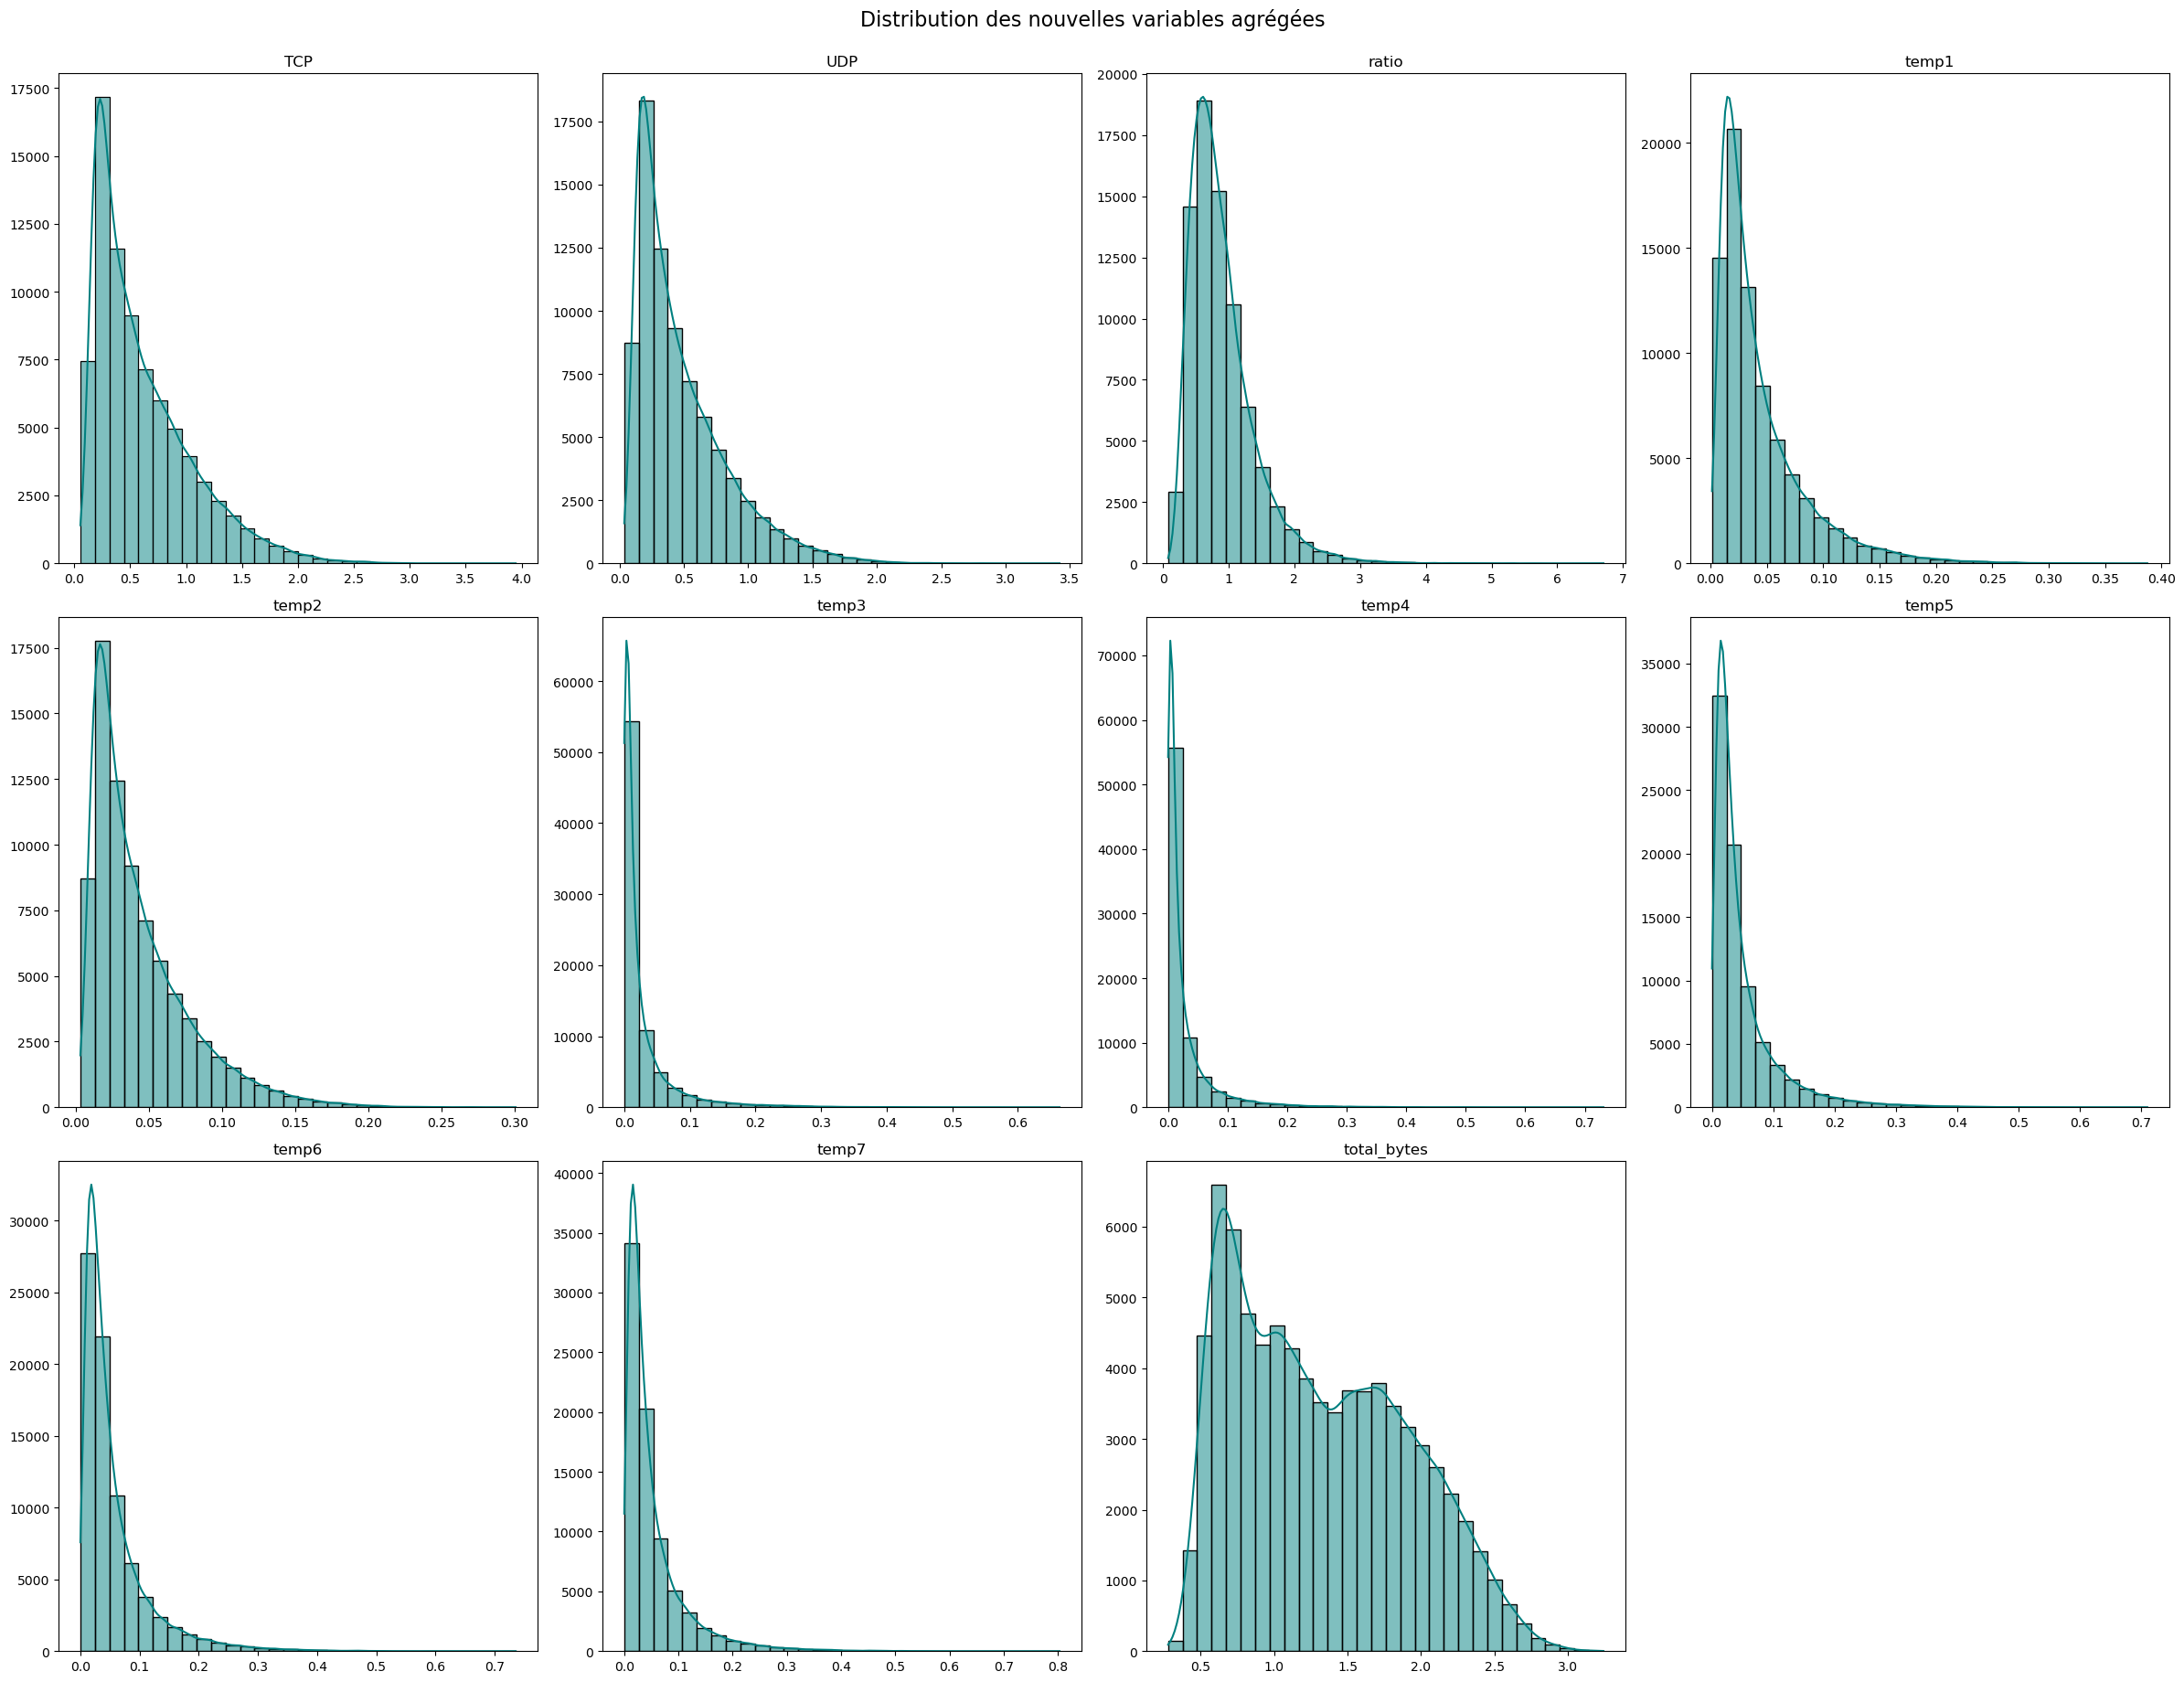

In [88]:
# Liste des colonnes
l = df.columns.values

# Paramètres d’affichage
number_of_columns = 4  
number_of_rows = int((len(range(40, 51)) - 1) / number_of_columns) + 1

plt.figure(figsize=(6 * number_of_columns, 6 * number_of_rows))

# Boucle sur les colonnes à afficher
for i, col_index in enumerate(range(40, 51)):
    plt.subplot(number_of_rows, number_of_columns, i + 1)
    sns.histplot(df[l[col_index]].astype('float64'), kde=True, bins=30, color='teal')
    plt.title(l[col_index], fontsize=12)
    plt.xlabel("")
    plt.ylabel("")
    plt.tight_layout()

plt.suptitle("Distribution des nouvelles variables agrégées", fontsize=16, y=1.02)
plt.show()

### Sélection des variables (Feature Selection)

La **sélection des variables** est un processus qui permet de **choisir automatiquement** les variables de votre jeu de données qui **contribuent le plus** à la variable cible que vous souhaitez prédire.

Avoir des variables non pertinentes peut **réduire la précision du modèle**, notamment pour les **algorithmes linéaires** comme la **régression linéaire** ou **logistique**.


 **Trois avantages majeurs de la sélection de variables :**

1. **Réduction du surapprentissage (Overfitting)**  
   ➤ Moins de données redondantes = moins de risque de modéliser du bruit.

2. **Amélioration de la précision**  
   ➤ Moins de données inutiles = meilleur focus sur les variables réellement explicatives.

3. **Réduction du temps d’entraînement**  
   ➤ Moins de variables = calculs plus rapides pour l’entraînement du modèle.


D’après les visualisations précédentes, on observe que **le nombre d’abonnés (subscriber count)** et les **données d’usage (`usage data`)** jouent un **rôle important dans la prédiction du type de congestion**.

**1. Sélection univariée des variables (Univariate Selection)**

On peut utiliser des **tests statistiques** pour sélectionner les variables qui ont les **relations les plus fortes avec la variable cible**.  
La bibliothèque `scikit-learn` propose la classe **`SelectKBest`**, qui peut être associée à différents tests statistiques pour choisir un **nombre défini de meilleures variables**.

In [89]:
# Suppression des colonnes inutiles
df = df.drop(['par_year', 'par_month', 'Congestion_Type'], axis=1)
test.drop(['par_year', 'par_month'], axis=1, inplace=True)

# Aperçu du DataFrame mis à jour
df.head()

,4G_rat,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,social_ntwrking_bytes,cloud_computing_total_bytes,web_security_total_bytes,gaming_total_bytes,health_total_bytes,communication_total_bytes,file_sharing_total_bytes,remote_access_total_bytes,photo_sharing_total_bytes,software_dwnld_total_bytes,marketplace_total_bytes,storage_services_total_bytes,audio_total_bytes,location_services_total_bytes,presence_total_bytes,advertisement_total_bytes,system_total_bytes,voip_total_bytes,speedtest_total_bytes,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor,morning,day,evening,night,TCP,UDP,ratio,temp1,temp2,temp3,temp4,temp5,temp6,temp7,total_bytes
0,1,50,0.009113,0.001003,0.163925,0.007423,0.053262,0.065626,0.215563,0.042269,0.064099,0.006061,0.047770,0.011866,0.045330,0.003396,0.005723,0.050681,0.032654,0.073828,0.051624,0.009612,0.009569,0.006184,0.006378,0.019452,0.027318,0.023920,0.062388,0.150000,0.8,0.000000,0,0,0,0,1,0.466072,0.698011,1.497647,0.070296,0.028866,0.004227,0.071409,0.029155,0.027504,0.027695,1.490457
1,1,5,0.003199,0.005988,0.000993,0.014808,0.003328,0.017257,0.008490,0.006960,0.000835,0.006061,0.015175,0.018397,0.016510,0.010152,0.010783,0.036040,0.001206,0.001527,0.027318,0.003856,0.011472,0.004951,0.013977,0.011834,0.004205,0.006188,0.013040,0.550000,1.0,1.000000,2,0,0,1,0,0.142356,0.131295,0.922298,0.008971,0.010855,0.010462,0.001182,0.017607,0.010685,0.023451,0.480161
2,1,35,0.016658,0.002838,0.002834,0.075403,0.009006,0.010746,0.003647,0.032483,0.023529,0.012085,0.024170,0.046641,0.038489,0.021868,0.028295,0.015175,0.001809,0.096764,0.004805,0.025430,0.088879,0.014167,0.008917,0.052751,0.029074,0.087322,0.094742,0.283333,0.8,0.333333,0,0,1,0,0,0.643799,0.234683,0.364528,0.019683,0.044512,0.040581,0.062704,0.043492,0.018311,0.018700,1.232391
3,0,60,0.003018,0.027196,0.001475,0.025879,0.003486,0.035381,0.011505,0.008850,0.013094,0.053267,0.030123,0.122194,0.009468,0.003396,0.008889,0.115402,0.023853,0.000973,0.007199,0.004497,0.021561,0.001859,0.006378,0.036814,0.024972,0.045504,0.021639,0.583333,1.0,0.000000,1,0,0,1,0,0.329469,0.356487,1.082007,0.017262,0.019582,0.026893,0.007077,0.069743,0.042646,0.062863,1.019471
4,1,60,0.007001,0.006669,0.003168,0.023589,0.012200,0.034802,0.053362,0.011991,0.003760,0.047487,0.240725,0.018397,0.041915,0.112478,0.013933,0.060804,0.409681,0.006169,0.066944,0.026685,0.160722,0.002478,0.041973,0.034516,0.053338,0.115366,0.180236,0.866667,0.2,1.000000,1,1,0,0,0,1.523565,0.444646,0.291846,0.037217,0.129138,0.015280,0.004978,0.030687,0.160402,0.090869,2.047339


**Sélection univariée des meilleures variables avec `SelectKBest` et test du chi²**

On utilise ici la méthode **`SelectKBest`** avec le test statistique **chi²**, pour sélectionner les **4 variables les plus pertinentes** vis-à-vis de la variable cible `Congestion_Type`.

**Remarques importantes :**

- `chi2` est adapté uniquement aux **données positives** (d’où l’intérêt d’avoir appliqué un `log(x+1)` auparavant).
- Le test mesure la **dépendance entre chaque variable explicative et la variable cible**, utile surtout pour les **données catégoriques ou discrètes**.
- Cette boucle compare chaque valeur ligne 0 (`features[0, j]`) avec la version initiale (`array[0, i]`) pour retrouver le **nom de la colonne** correspondante. Cette méthode est un peu fragile si deux colonnes ont la même valeur sur la première ligne.

In [90]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np

array = df.values
X = array[:, :]  # Variables explicatives

# Sélection des 4 meilleures variables selon le test chi²
test_kbest = SelectKBest(score_func=chi2, k=4)
fit = test_kbest.fit(X, y)

# Affichage des scores de chaque variable
np.set_printoptions(precision=3)
print(fit.scores_)

# Transformation des données pour ne garder que les 4 meilleures features
features = fit.transform(X)

# Affichage des noms des variables sélectionnées
j = 0
for i in range(0, 51):  
    if j < 4 and features[0, j] == array[0, i]:
        print(df.columns.values[i])
        j += 1

[5.282e-01 5.585e+01 9.273e+02 6.506e+02 6.148e+02 6.643e+02 7.744e+02
 9.480e+02 9.368e+02 9.931e+02 6.591e+02 1.131e+03 1.106e+03 1.077e+03
 9.696e+02 1.116e+03 9.546e+02 1.032e+03 9.444e+02 6.572e+02 9.086e+02
 9.905e+02 9.841e+02 9.623e+02 9.854e+02 9.434e+02 9.262e+02 9.352e+02
 9.168e+02 3.024e-01 2.272e-01 7.112e-01 5.045e-01 1.089e+00 1.998e+00
 1.680e+00 1.137e+00 1.602e+04 1.233e+04 1.082e+01 1.132e+03 1.136e+03
 7.853e+02 7.815e+02 1.225e+03 1.338e+03 1.289e+03 1.715e+04]
TCP
UDP
temp6
total_bytes


### Élimination récursive des variables (Recursive Feature Elimination – RFE)

La méthode **RFE (Recursive Feature Elimination)** consiste à **éliminer de manière récursive** certaines variables, en construisant un modèle à chaque étape avec les variables restantes.

Elle utilise la **précision du modèle** comme critère pour identifier **quelles variables (ou combinaisons de variables)** contribuent le plus à la prédiction de la variable cible.

**Sélection de variables avec RFE (Recursive Feature Elimination)**

On utilise ici **RFE** avec un modèle de **régression logistique** pour sélectionner les **4 variables les plus importantes** dans la prédiction de la variable cible.

Voici ta section reformulée en français avec des explications ligne par ligne :

**Sélection de variables avec RFE (Recursive Feature Elimination)**

On utilise ici **RFE** avec un modèle de **régression logistique** pour sélectionner les **4 variables les plus importantes** dans la prédiction de la variable cible.

In [91]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Modèle de base
model = LogisticRegression()

rfe = RFE(estimator=model, n_features_to_select=4)
fit = rfe.fit(X, y)

print("Nombre de variables sélectionnées :", fit.n_features_)
print("Variables sélectionnées (booléen) :", fit.support_)
print("Classement des variables :", fit.ranking_)

Nombre de variables sélectionnées : 4
Variables sélectionnées (booléen) : [False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True  True False False False False False False False False  True]
Classement des variables : [44 45  1  8 33 13 29 15 19 24 17 10 11 38 14 37 36 18 27  9 20 34 35 30
 28 25 31 21 26 40 41 42 43  3  4  5  2  1  1 39 22 16  7 12 23  6 32  1]


In [92]:
# Affichage des noms des variables sélectionnées
selected_columns = df.columns[fit.support_]
print("Variables sélectionnées :", selected_columns.tolist())

Variables sélectionnées : ['subscriber_count', 'TCP', 'UDP', 'total_bytes']


### Importance des variables avec les arbres de décision

Lorsqu’on entraîne un classificateur comme un **décision Tree**, chaque variable est évaluée pour déterminer la **meilleure séparation** des données.  
Cette mesure peut alors être utilisée pour **évaluer l’importance des variables**.

Les **forêts aléatoires (Random Forests)** sont parmi les méthodes les plus populaires en machine learning grâce à :
- leur **bonne précision**,
- leur **robustesse aux données bruitées**,
- et leur **simplicité d’utilisation**.

Elles offrent également deux méthodes simples pour la **sélection de variables** :
1. **Diminution moyenne de l’impureté** (*mean decrease impurity*)  
2. **Diminution moyenne de la précision** (*mean decrease accuracy*)

**Évaluation de l’importance des variables avec Random Forest**

Dans cette étape, on utilise un **RandomForestClassifier** pour :
1. Entraîner un modèle sur les données.
2. Prédire les classes.
3. Calculer l’**importance relative des variables**.
4. Visualiser les **10 variables les plus importantes** dans un **graphique en barres horizontales**.

**Pourquoi c’est utile :**
- Cette méthode est robuste, même si les variables sont corrélées ou non normalisées.
- Le graphe permet de **voir rapidement quelles variables influencent le plus le modèle**.

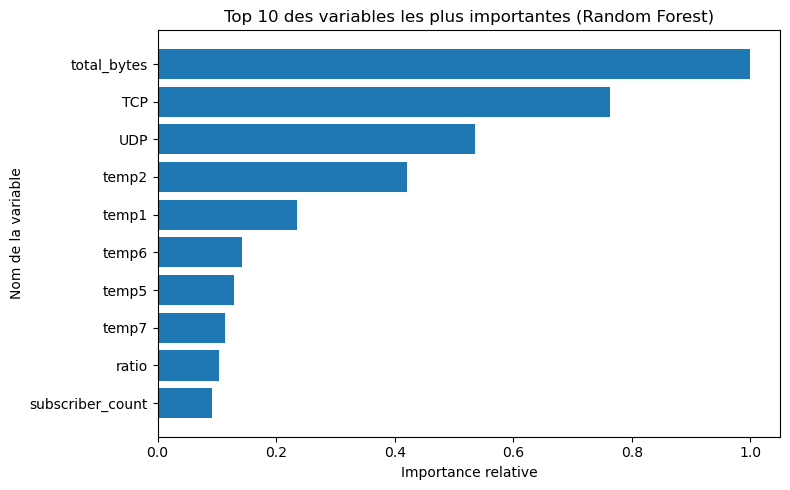

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(df, y, stratify=y, test_size=0.25)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Calcul de l'importance relative des variables
features = df.columns.values
importance = clf.feature_importances_ / np.max(clf.feature_importances_)  # Normalisation

# Tri des variables selon leur importance
idx = np.argsort(importance)

# Paramètres pour l'affichage des n variables les plus importantes
n = 10
pos = np.arange(n) + 0.5

fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(pos, importance[idx[-n:]], align='center')
plt.yticks(pos, features[idx[-n:]])
ax.set_xlabel("Importance relative")
ax.set_ylabel("Nom de la variable")
ax.set_title("Top 10 des variables les plus importantes (Random Forest)")
plt.tight_layout()
plt.show()

On constate que les **nouvelles variables issues de l’ingénierie des caractéristiques** offrent des performances **nettement supérieures** à celles des variables d’origine.

Quel que soit le **type de méthode de sélection utilisée** (SelectKBest, RFE, ou Random Forest), les nouvelles variables ont **clairement montré leur importance** dans la prédiction.

Des variables comme **`TCP`**, **`UDP`**, **`Total`**, ou encore **`temp5_t`** se sont révélées être **parmi les plus influentes** dans la détection du type de congestion.

### Modélisation

Une fois que les données ont été **prétraitées** et que les **nouvelles variables** ont été ajoutées, il est temps de passer à l’étape de **modélisation**.  
Cette phase consiste à **entraîner des modèles de Machine Learning** sur les données d’apprentissage afin de pouvoir effectuer des **prédictions fiables**.

Dans ce projet, nous allons testé plusieurs algorithmes de classification, notamment :

- **Régression Logistique**
- **Arbres de Décision**
- **Forêts Aléatoires (Random Forests)**
- **XGBoost**
- **Perceptron Multicouche (MLP)**
- **Réseaux de Neurones Artificiels (ANN)**

In [94]:
# Modèles classiques de classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Modèle gradient boosting
from xgboost import XGBClassifier

# Optimisation et validation croisée
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

# Perceptron multicouche (MLP)
from sklearn.neural_network import MLPClassifier

# Réseaux de neurones avec Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Métriques d’évaluation
from sklearn.metrics import confusion_matrix      # analyse fine des prédictions
from sklearn.metrics import accuracy_score        # précision globale
from sklearn.metrics import matthews_corrcoef     # mesure robuste même en cas de classes déséquilibrées

### Logistic Regression

In [95]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3)

# Création du modèle de régression logistique multiclasse
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')

clf.fit(X_train, y_train)

y_pred_lr = clf.predict(X_test)

In [96]:
cm = confusion_matrix(y_test, y_pred_lr)
accuracy = accuracy_score(y_test, y_pred_lr)
mcc = matthews_corrcoef(y_test, y_pred_lr)

print("Matrice de confusion :\n", cm)
print("Accuracy :", accuracy)
print("Matthews Correlation Coefficient :", mcc)

Matrice de confusion :
 [[4028  923    0  906]
 [ 912 3887 1094   17]
 [  48 1175 4645    0]
 [ 710    0    0 5223]]
Accuracy : 0.7545400543109301
Matthews Correlation Coefficient : 0.6727773963361285


### Decision Tree Classifier

In [97]:
# Validation croisée stratifiée (5 itérations, test = 20%)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Grille de recherche des hyperparamètres
param_grid = {
    "max_depth": np.linspace(10, 15, 6).astype(int),          
    "min_samples_split": np.linspace(2, 5, 4).astype(int)     
}

# Recherche des meilleurs paramètres avec GridSearch
clf_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=cv)

clf_dt.fit(X_train, y_train)

y_pred_dt = clf_dt.predict(X_test)

In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score, matthews_corrcoef

cm = confusion_matrix(y_test, y_pred_dt)
accuracy = accuracy_score(y_test, y_pred_dt)
mcc = matthews_corrcoef(y_test, y_pred_dt)

print("Matrice de confusion :\n", cm)
print("Accuracy :", accuracy)
print("Matthews Correlation Coefficient :", mcc)

Matrice de confusion :
 [[4477  709    2  669]
 [ 873 4064  967    6]
 [  38 1344 4486    0]
 [ 695    0    0 5238]]
Accuracy : 0.7749915139171758
Matthews Correlation Coefficient : 0.7002050705140476


### Random Forest Classifier (Forêt Aléatoire)

In [99]:
# Création et entraînement du modèle Random Forest
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)

y_pred_rf = clf2.predict(X_test)

In [100]:
cm = confusion_matrix(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)
mcc = matthews_corrcoef(y_test, y_pred_rf)

print("Matrice de confusion :\n", cm)
print("Accuracy :", accuracy)
print("Matthews Correlation Coefficient :", mcc)

Matrice de confusion :
 [[4533  623    0  701]
 [ 833 4136  937    4]
 [  36 1185 4647    0]
 [ 551    0    0 5382]]
Accuracy : 0.7933638832315003
Matthews Correlation Coefficient : 0.7245755946136172


### XGBoost Classifier

In [101]:
# Définition du modèle avec des hyperparamètres personnalisés
xgb = XGBClassifier(
    learning_rate=0.05,         # Taux d'apprentissage
    n_estimators=500,           # Nombre total d’arbres
    max_depth=5,                # Profondeur maximale de chaque arbre
    min_child_weight=2,         # Nombre minimum d’exemples pour un nœud enfant
    gamma=0.1,                  # Seuil de perte minimale pour faire une division
    subsample=0.6,              # Fraction d’échantillons utilisée pour chaque arbre
    colsample_bytree=0.7,       # Fraction de colonnes utilisées par arbre
    reg_alpha=0.1,              # Régularisation L1
    objective='multi:softmax',  # Classification multiclasse
    scale_pos_weight=1,         # Pondération des classes (1 = pas de pondération)
    random_state=7,
    seed=27
)

# Entraînement du modèle
xgb.fit(X_train, y_train)

# Prédictions
y_pred_xgb = xgb.predict(X_test)

In [102]:
cm = confusion_matrix(y_test, y_pred_xgb)
accuracy = accuracy_score(y_test, y_pred_xgb)
mcc = matthews_corrcoef(y_test, y_pred_xgb)

print("Matrice de confusion :\n", cm)
print("Accuracy :", accuracy)
print("Matthews Correlation Coefficient :", mcc)

Matrice de confusion :
 [[4609  578    0  670]
 [ 805 4209  894    2]
 [  27 1149 4692    0]
 [ 515    1    0 5417]]
Accuracy : 0.8030804480651731
Matthews Correlation Coefficient : 0.7375330509962092


### Multi-Layer Perceptron (Perceptron Multicouche MLPClassifier)

In [103]:
# Validation croisée stratifiée
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Grille des hyperparamètres à tester
param_grid = {
    "hidden_layer_sizes": [(50,), (50, 50)],       # 1 ou 2 couches cachées de 50 neurones
    "alpha": np.logspace(-2, 2, 6)                 # Paramètre de régularisation L2
}

# Recherche par validation croisée avec GridSearch
clf_mlp = GridSearchCV(
    MLPClassifier(solver='lbfgs', max_iter=600),   # Solveur 'lbfgs' efficace pour petits datasets
    param_grid=param_grid,
    cv=cv,
    n_jobs=-1,                                     # Utilise tous les cœurs CPU pour accélérer
    verbose=2                                      # Affiche les étapes en console
)

# Entraînement du modèle
clf_mlp.fit(X_train, y_train)

# Prédictions sur le jeu de test
y_pred_mlp = clf_mlp.predict(X_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [104]:
cm = confusion_matrix(y_test, y_pred_mlp)
accuracy = accuracy_score(y_test, y_pred_mlp)
mcc = matthews_corrcoef(y_test, y_pred_mlp)

print("Matrice de confusion :\n", cm)
print("Accuracy :", accuracy)
print("Matthews Correlation Coefficient :", mcc)

Matrice de confusion :
 [[4450  667    0  740]
 [ 836 4077  988    9]
 [  34 1155 4679    0]
 [ 563    0    0 5370]]
Accuracy : 0.7881873727087576
Matthews Correlation Coefficient : 0.7176381848984579


### Optimisation des hyperparamètres du classificateur XGBoost offrant une meilleur robustesse

On effectue ici une **recherche par grille (GridSearchCV)** pour **ajuster le taux d’apprentissage (`learning_rate`)** du modèle XGBoost, tout en gardant les autres paramètres constants.

In [105]:
# Définition de la grille de recherche
param_test1 = {
    'learning_rate': [0.01, 0.025, 0.05]
}

# Configuration du modèle avec paramètres fixés, sauf learning_rate
gsearch1 = GridSearchCV(
    estimator=XGBClassifier(
        learning_rate=0.1,
        n_estimators=140,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='multi:softmax',
        nthread=4,
        scale_pos_weight=1,
        seed=27
    ),
    param_grid=param_test1,
    n_jobs=4,
    cv=5,
    verbose=1
)

# Lancement de la recherche
gsearch1.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=140,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=4, param_grid={'learning_rate': [0.01, 0.025, 0.05]},
             verbose=1)

In [106]:
# Affichage des résultats de l’optimisation
print("Meilleurs paramètres trouvés :", gsearch1.best_params_)
print("Meilleur score (validation croisée) :", gsearch1.best_score_)

Meilleurs paramètres trouvés : {'learning_rate': 0.05}
Meilleur score (validation croisée) : 0.7957339291586312


**Recherche par grille : réglage du paramètre `reg_alpha` pour XGBoost**

On effectue une **recherche par grille (`GridSearchCV`)** pour optimiser le **paramètre de régularisation L1** (`reg_alpha`) du modèle **XGBoost**, tout en maintenant les autres hyperparamètres constants.

In [107]:
# Grille des valeurs à tester pour reg_alpha (régularisation L1)
param_test2 = {
    'reg_alpha': np.linspace(0.1, 0.5, 5)  # Valeurs de 0.1 à 0.5
}

# Définition du classificateur avec paramètres constants sauf reg_alpha
gsearch2 = GridSearchCV(
    estimator=XGBClassifier(
        learning_rate=0.1,
        n_estimators=140,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='multi:softmax',
        nthread=4,
        scale_pos_weight=1,
        seed=27
    ),
    param_grid=param_test2,
    n_jobs=4,
    cv=5,
    verbose=1  # Affiche la progression
)

# Entraînement du modèle avec recherche d'hyperparamètres
gsearch2.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=140,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=4,
             param_grid={'reg_alpha': array([0.1, 0.2, 0.3, 0.4, 0.5])},
             verbose=1)

In [108]:
# Affichage des résultats optimaux
print("Meilleur paramètre trouvé :", gsearch2.best_params_)
print("Meilleur score de validation croisée :", gsearch2.best_score_)

Meilleur paramètre trouvé : {'reg_alpha': 0.2}
Meilleur score de validation croisée : 0.800589198697344


**Recherche par grille : optimisation du paramètre `reg_lambda` pour XGBoost**

On effectue ici une **recherche d’hyperparamètres (`GridSearchCV`)** sur le paramètre de **régularisation L2 (`reg_lambda`)**, tout en gardant les autres paramètres constants.  
Cette régularisation aide à **réduire le surapprentissage** en pénalisant les poids élevés dans le modèle.

In [109]:
# Grille de valeurs à tester pour la régularisation L2
param_test3 = {
    'reg_lambda': np.linspace(0, 0.6, 7)  # 7 valeurs de 0.0 à 0.6 inclus
}

# Définition du classificateur avec hyperparamètres constants sauf reg_lambda
gsearch3 = GridSearchCV(
    estimator=XGBClassifier(
        learning_rate=0.1,
        n_estimators=140,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='multi:softmax',
        nthread=4,
        scale_pos_weight=1,
        seed=27
    ),
    param_grid=param_test3,
    n_jobs=4,
    cv=5,
    verbose=1
)

# Entraînement du modèle avec recherche d'hyperparamètre
gsearch3.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=140,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=4,
             param_grid={'reg_lambda': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])},
             verbose=1)

In [110]:
# Affichage du meilleur paramètre et du meilleur score
print("Meilleur paramètre trouvé :", gsearch3.best_params_)
print("Meilleur score de validation croisée :", gsearch3.best_score_)

Meilleur paramètre trouvé : {'reg_lambda': 0.39999999999999997}
Meilleur score de validation croisée : 0.80028005819306


### Modèle final XGBoost avec hyperparamètres optimisés

On entraîne ici le **modèle final XGBoost** en utilisant les **meilleurs hyperparamètres** trouvés lors des précédentes recherches (`GridSearchCV`) :

In [111]:
# Modèle XGBoost final avec hyperparamètres optimisés
xgb = XGBClassifier(
    learning_rate=0.05,        # Taux d'apprentissage optimisé
    n_estimators=500,          # Nombre d'arbres
    max_depth=5,               # Profondeur maximale des arbres
    min_child_weight=2,        # Nombre minimal d'échantillons par feuille
    gamma=0.1,                 # Seuil de réduction de la perte
    subsample=0.6,             # Portion d'échantillons utilisée par arbre
    colsample_bytree=0.7,      # Portion de colonnes utilisée par arbre
    reg_alpha=0.4,             # Régularisation L1 (optimisée)
    reg_lambda=0.6,            # Régularisation L2 (optimisée)
    objective='multi:softmax', # Problème de classification multiclasse
    scale_pos_weight=1,        # Pas de pondération spécifique des classes
    random_state=7,
    seed=27
)

# Entraînement du modèle
xgb.fit(X_train, y_train)

# Prédictions sur le jeu de test
y_pred_xgb = xgb.predict(X_test)

In [112]:
cm = confusion_matrix(y_test, y_pred_xgb)
accuracy = accuracy_score(y_test, y_pred_xgb)
mcc = matthews_corrcoef(y_test, y_pred_xgb)

print("Matrice de confusion :\n", cm)
print("Accuracy :", accuracy)
print("Matthews Correlation Coefficient :", mcc)

Matrice de confusion :
 [[4612  576    0  669]
 [ 810 4203  894    3]
 [  28 1136 4704    0]
 [ 528    1    0 5404]]
Accuracy : 0.8029107264086898
Matthews Correlation Coefficient : 0.7373023245510311


In [113]:
# Prédictions sur les données d'entraînement
y_pred_xg = xgb.predict(X_train)

cm = confusion_matrix(y_train, y_pred_xg)
accuracy = accuracy_score(y_train, y_pred_xg)
mcc = matthews_corrcoef(y_train, y_pred_xg)

print("Matrice de confusion (train) :\n", cm)
print("Accuracy (train) :", accuracy)
print("Matthews Correlation Coefficient (train) :", mcc)

Matrice de confusion (train) :
 [[11730   932     1  1168]
 [ 1476 11125  1248     6]
 [   43  1988 11437     0]
 [  789     0     0 13049]]
Accuracy (train) : 0.8608706720977597
Matthews Correlation Coefficient (train) : 0.8146125192041602


### Prédiction sur les données de test finales

On utilise le **modèle XGBoost final entraîné** pour effectuer les **prédictions sur le jeu de test** (données non étiquetées), puis on **recode les prédictions en labels originaux** grâce à l’encodeur utilisé plus tôt.

In [114]:
# Prédiction des classes sur les données de test
y_pred_test = xgb.predict(test)

# Décodage des étiquettes (valeurs numériques → labels d'origine)
y_pred_test = labelencoder_y.inverse_transform(y_pred_test)

### Export du fichier de soumission

On crée un **DataFrame final** contenant :

- la colonne **`cell_name`** (identifiant de chaque cellule du réseau),
- la **prédiction du type de congestion** (`Congestion_Type`) pour chaque cellule.

Puis, on exporte ce tableau au format **CSV** sous le nom `Submission.csv`.

In [115]:
# Création du DataFrame final avec les prédictions
df_final = pd.DataFrame({
    'cell_name': cell_name,
    'Congestion_Type': y_pred_test
})

# Export du fichier au format CSV
df_final.to_csv('Submission.csv', header=True, index=False)


# Aperçu des premières lignes du fichier
print("Aperçu des premières lignes du fichier généré :")
print(df_final.head())

Aperçu des premières lignes du fichier généré :
    cell_name         Congestion_Type
0  4398447675  3G_BACKHAUL_CONGESTION
1  4152570378  3G_BACKHAUL_CONGESTION
2  2902602672       4G_RAN_CONGESTION
3  1080083695                      NC
4  4413045057  4G_BACKHAUL_CONGESTION
